In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Load the NumPy data files
train_images = np.load('kmnist-train-imgs.npz')['arr_0']
train_labels = np.load('kmnist-train-labels.npz')['arr_0']
test_images = np.load('kmnist-test-imgs.npz')['arr_0']
test_labels = np.load('kmnist-test-labels.npz')['arr_0']

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

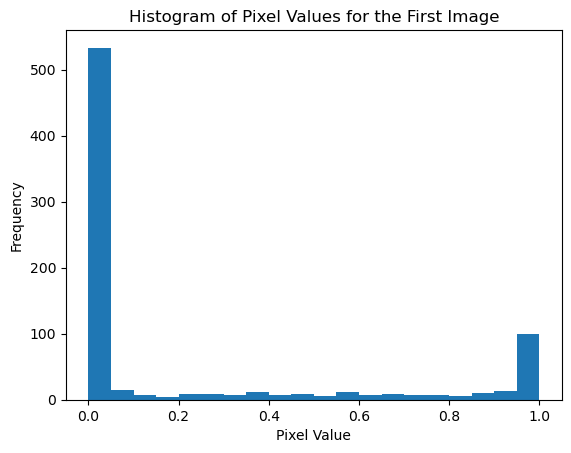

In [3]:
# Example: Visualize the pixel values of the first image
plt.hist(train_images[0].ravel(), bins=20)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Values for the First Image')
plt.show()

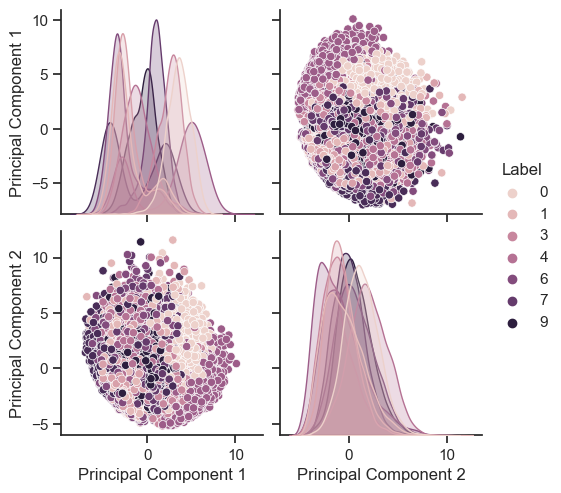

In [4]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(train_images.reshape(train_images.shape[0], -1))

# Create a DataFrame with the reduced data and labels
subset_data = pd.DataFrame({
    'Principal Component 1': reduced_features[:, 0],
    'Principal Component 2': reduced_features[:, 1],
    'Label': train_labels
})

# Example: Pair plot with consistent filled circle markers for all classes
sns.set(style="ticks")
sns.pairplot(subset_data, hue='Label', markers="o")
plt.show()

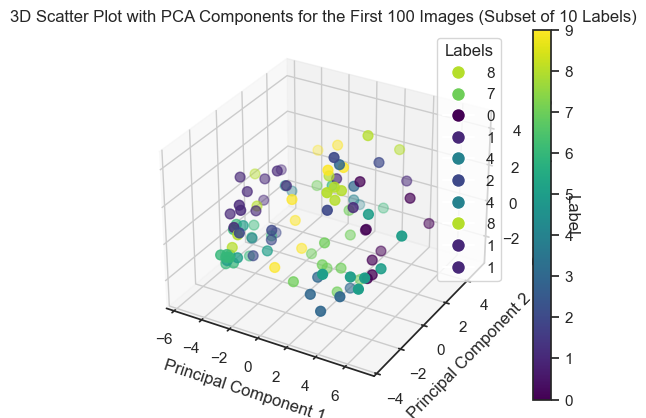

In [5]:
# Define the number of labels to display in the legend
N = 10  # Number of labels to display

# Perform PCA for dimensionality reduction
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(train_images.reshape(train_images.shape[0], -1))

# Create a 3D scatter plot using the first three principal components
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color mapping based on labels
scatter = ax.scatter(
    reduced_features[:100, 0], reduced_features[:100, 1], reduced_features[:100, 2],
    c=train_labels[:100], cmap='viridis', marker='o', s=50
)

# Add a colorbar to the plot
cbar = plt.colorbar(scatter)
cbar.set_label('Label', rotation=270)

# Create a legend for the scatter plot with a subset of labels
subset_labels = train_labels[:N]
subset_colors = scatter.to_rgba(subset_labels)
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=c, markersize=10) for c in subset_colors]
labels = [str(label) for label in subset_labels]
ax.legend(handles, labels, title='Labels', loc='upper right')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title(f'3D Scatter Plot with PCA Components for the First 100 Images (Subset of {N} Labels)')
plt.show()

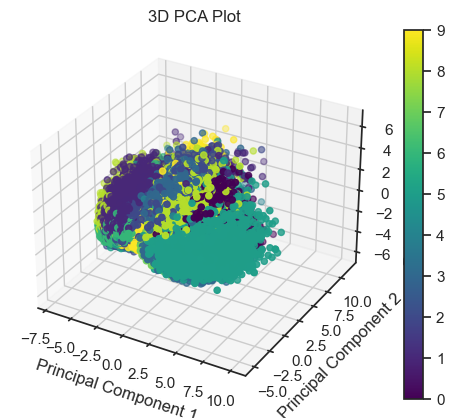

In [6]:
# Perform PCA for dimensionality reduction with 3 principal components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(train_images.reshape(train_images.shape[0], -1))

# Create a 3D PCA plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=train_labels, cmap='viridis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA Plot')
fig.colorbar(scatter)
plt.show()

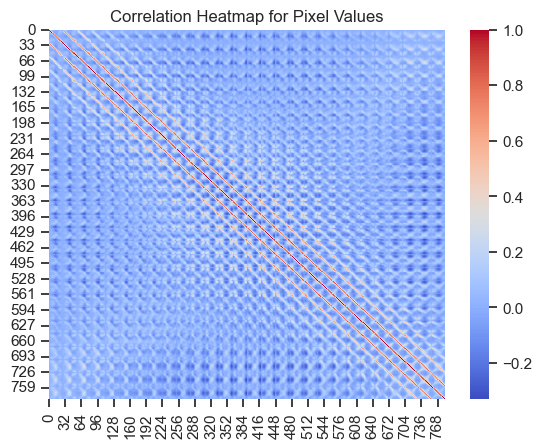

In [7]:
# Reshape the images and create a DataFrame
reshaped_images = train_images.reshape(train_images.shape[0], -1)
df = pd.DataFrame(reshaped_images)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap for Pixel Values')
plt.show()

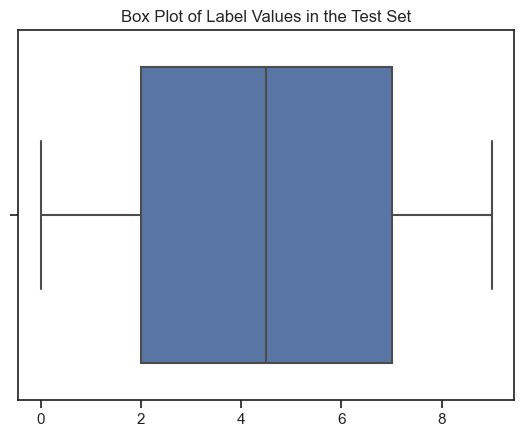

In [8]:
# Example: Visualize the distribution of label values in the test setsns.boxplot(x=test_labels)
plt.title('Box Plot of Label Values in the Test Set')
plt.show()


In [9]:
# Define the CNN model
model = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

Epoch 1/100
1875/1875 [==============================] - 28s 14ms/step - loss: 0.2492 - accuracy: 0.9246 - val_loss: 0.2708 - val_accuracy: 0.9204
Epoch 2/100
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0763 - accuracy: 0.9769 - val_loss: 0.2203 - val_accuracy: 0.9391
Epoch 3/100
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0447 - accuracy: 0.9859 - val_loss: 0.2084 - val_accuracy: 0.9473
Epoch 4/100
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0276 - accuracy: 0.9915 - val_loss: 0.2226 - val_accuracy: 0.9442
Epoch 5/100
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0187 - accuracy: 0.9939 - val_loss: 0.2290 - val_accuracy: 0.9469
Epoch 6/100
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0140 - accuracy: 0.9956 - val_loss: 0.2824 - val_accuracy: 0.9410
Epoch 7/100
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0115 - accuracy: 0.9964 - val_loss: 0

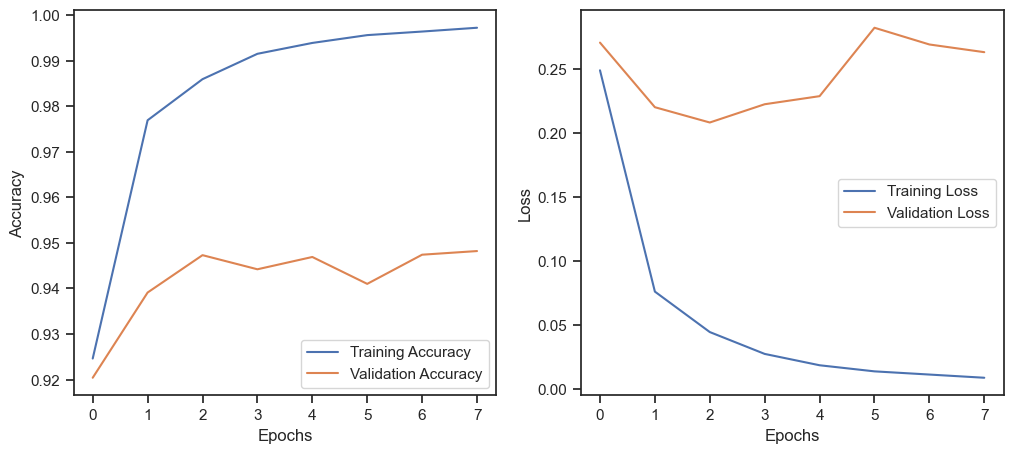

In [10]:
# Define early stopping based on validation loss
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,  # Number of epochs with no improvement to wait
    restore_best_weights=True  # Restore model to best weights when stopping
)

# Train the model
history = model.fit(train_images, train_labels, epochs=100, validation_data=(test_images, test_labels), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 [==============================] - 2s 5ms/step


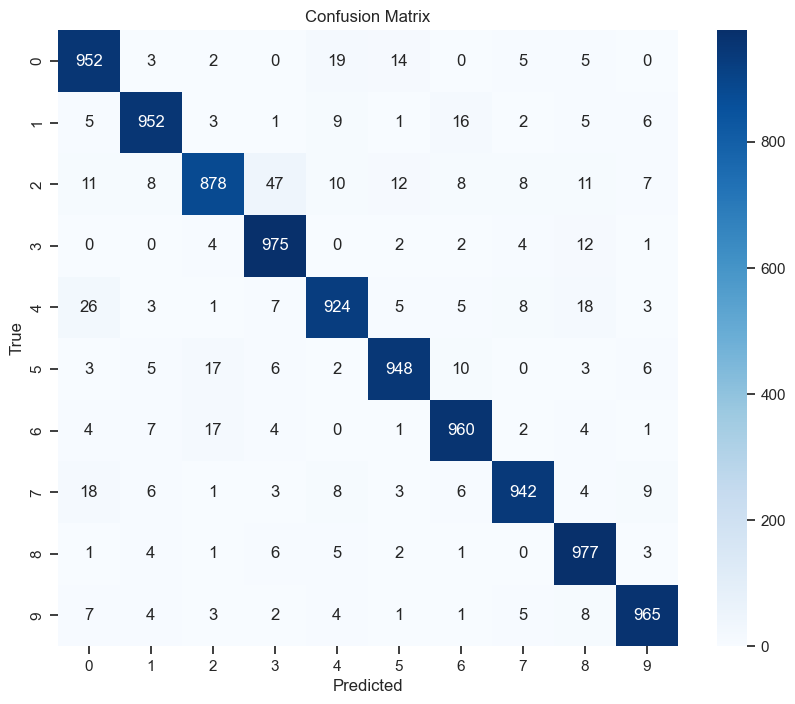

In [11]:
test_predictions = model.predict(test_images)
test_predictions_classes = np.argmax(test_predictions, axis=1)
confusion_mtx = confusion_matrix(test_labels, test_predictions_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [12]:
accuracy_data = {
    'Epoch': list(range(1, len(history.history['accuracy']) + 1)),
    'Training Accuracy': history.history['accuracy'],
    'Validation Accuracy': history.history['val_accuracy']
}

loss_data = {
    'Epoch': list(range(1, len(history.history['loss']) + 1)),
    'Training Loss': history.history['loss'],
    'Validation Loss': history.history['val_loss']
}

df_accuracy = pd.DataFrame(accuracy_data)
df_loss = pd.DataFrame(loss_data)

# Display the tables
print("Accuracy History:")
print(df_accuracy)

print("\nLoss History:")
print(df_loss)

Accuracy History:
   Epoch  Training Accuracy  Validation Accuracy
0      1           0.924617               0.9204
1      2           0.976900               0.9391
2      3           0.985917               0.9473
3      4           0.991483               0.9442
4      5           0.993867               0.9469
5      6           0.995583               0.9410
6      7           0.996367               0.9474
7      8           0.997200               0.9482

Loss History:
   Epoch  Training Loss  Validation Loss
0      1       0.249157         0.270793
1      2       0.076258         0.220326
2      3       0.044657         0.208372
3      4       0.027581         0.222641
4      5       0.018716         0.228956
5      6       0.013952         0.282403
6      7       0.011459         0.269333
7      8       0.008959         0.263321


In [13]:
# Calculate the F1 score
f1 = f1_score(test_labels, test_predictions_classes, average='weighted')

print(f"Weighted F1 Score: {f1:.4f}")

Weighted F1 Score: 0.9471


In [14]:
val_loss = history.history['val_loss']
print(f"Validation Loss: {val_loss[-1]:.4f}")

Validation Loss: 0.2633


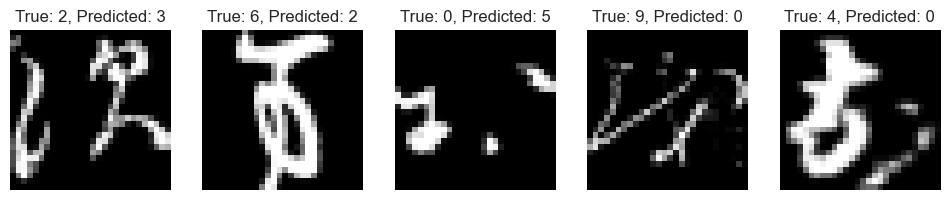

In [15]:
misclassified_indices = np.where(test_labels != test_predictions_classes)[0]

plt.figure(figsize=(12, 4))
for i, idx in enumerate(misclassified_indices[:5]):  # Display the first 5 misclassified examples
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')  # Reshape the image
    plt.title(f"True: {test_labels[idx]}, Predicted: {test_predictions_classes[idx]}")
    plt.axis('off')
plt.show()